### Imports

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import operator
import os, sys
import re, string
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [2]:
plt.rcParams['figure.figsize'] = 20,12

In [3]:
#This are stop_words in common taken from intenet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

### Creating X and Y 

X is a list where each element is a tuple. First element of tuple is the name of document and second element is the actual text

Y is the name of categories

In [4]:
X = []
Y = []
for category in os.listdir("20_newsgroups"):
    
    for document in os.listdir("20_newsgroups/" + category):
        with open("20_newsgroups/" + category +"/" + document,
                  'r') as f:
            X.append((document, f.read()))
            Y.append(category)

### Train Test Splitting

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Training Data Lengths:")
print("Length of x_train:", len(x_train))
print("Length of y_train:", len(y_train))
print()
print("Test Data Lengths:")
print("Length of x_test:", len(x_test))
print("Length of y_test:", len(y_test))

Training Data Lengths:
Length of x_train: 14997
Length of y_train: 14997

Test Data Lengths:
Length of x_test: 5000
Length of y_test: 5000


In [6]:
print(x_train[0][1])

Xref: cantaloupe.srv.cs.cmu.edu soc.religion.christian:21673
Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!darwin.sura.net!bogus.sura.net!news-feed-1.peachnet.edu!concert!rutgers!igor.rutgers.edu!geneva.rutgers.edu!christian
From: duncans@phoenix.princeton.edu (Duncan Eric Smith)
Newsgroups: soc.religion.christian
Subject: Verse divisions
Message-ID: <May.18.00.55.42.1993.9587@geneva.rutgers.edu>
Date: 18 May 93 04:55:43 GMT
Sender: hedrick@geneva.rutgers.edu
Organization: Princeton University
Lines: 5
Approved: christian@aramis.rutgers.edu

I'm wondering if anyone knows the answer to a rather trivial question which
I've been thinking about: What was the process used to divide the Bible into
verses. I believe Jerome divided the New Testament, but I've never seen any
discussion of *how* he did this. It seems rather arbitrary, as opposed to, for
example, making each sentence a verse.



### Make a Dictionary on x_train

In [7]:
dic = {}
for i in range(len(x_train)):
    text = x_train[i][1]
    # 1 because at 0 the name is present and at 1 the text is present
    # making all text lower
    text = text.lower()
    # splitting into words
    words = re.split(r"\W+",text)
    # iterating through all words in words
    for word in words:
        #Check if word is alphanumeric or a stop word or len is less than 2:
        if not(word.isalpha()) or word in stop_word or len(word) <= 2:
            continue
        if word in dic:
            dic[word] += 1
        else:
            dic[word] = 1
            
dic

{'xref': 4570,
 'cantaloupe': 19557,
 'srv': 24266,
 'cmu': 39283,
 'edu': 122718,
 'soc': 4628,
 'religion': 4078,
 'christian': 3790,
 'path': 15258,
 'das': 4586,
 'news': 25773,
 'harvard': 5209,
 'noc': 4709,
 'near': 5199,
 'net': 19235,
 'howland': 8274,
 'reston': 8245,
 'ans': 8341,
 'darwin': 1803,
 'sura': 2808,
 'bogus': 1075,
 'feed': 822,
 'peachnet': 683,
 'concert': 324,
 'rutgers': 5203,
 'igor': 808,
 'geneva': 1149,
 'duncans': 6,
 'phoenix': 203,
 'princeton': 457,
 'duncan': 42,
 'eric': 625,
 'smith': 645,
 'newsgroups': 15310,
 'subject': 16210,
 'verse': 160,
 'divisions': 34,
 'message': 16527,
 'may': 6251,
 'date': 15610,
 'gmt': 13363,
 'sender': 8300,
 'hedrick': 741,
 'organization': 14875,
 'university': 7449,
 'lines': 15671,
 'approved': 984,
 'aramis': 738,
 'wondering': 401,
 'anyone': 3294,
 'knows': 534,
 'answer': 1044,
 'rather': 1524,
 'trivial': 66,
 'question': 2375,
 'thinking': 570,
 'process': 594,
 'used': 3206,
 'divide': 49,
 'bible': 102

In [8]:
# Now that we have our dictionary with frequency as values, let's sort this according to values
sorted_dic = sorted(dic.items(),key=operator.itemgetter(1), reverse = True)
sorted_dic

[('edu', 122718),
 ('cmu', 39283),
 ('com', 37890),
 ('news', 25773),
 ('not', 25302),
 ('srv', 24266),
 ('cantaloupe', 19557),
 ('net', 19235),
 ('message', 16527),
 ('subject', 16210),
 ('lines', 15671),
 ('date', 15610),
 ('apr', 15390),
 ('newsgroups', 15310),
 ('path', 15258),
 ('can', 14898),
 ('organization', 14875),
 ('state', 14063),
 ('gmt', 13363),
 ('one', 11961),
 ('ohio', 11829),
 ('will', 11694),
 ('writes', 10957),
 ('article', 10002),
 ('comp', 9933),
 ('references', 9699),
 ('talk', 9345),
 ('misc', 9095),
 ('ans', 8341),
 ('sender', 8300),
 ('howland', 8274),
 ('reston', 8245),
 ('don', 7994),
 ('like', 7781),
 ('people', 7723),
 ('university', 7449),
 ('posting', 7442),
 ('just', 7359),
 ('nntp', 7082),
 ('mps', 6857),
 ('know', 6853),
 ('host', 6754),
 ('sci', 6529),
 ('get', 6493),
 ('usenet', 6317),
 ('may', 6251),
 ('zaphod', 6187),
 ('alt', 6088),
 ('think', 6031),
 ('politics', 5992),
 ('also', 5741),
 ('windows', 5690),
 ('time', 5248),
 ('new', 5237),
 ('use

### Plotting Frequency

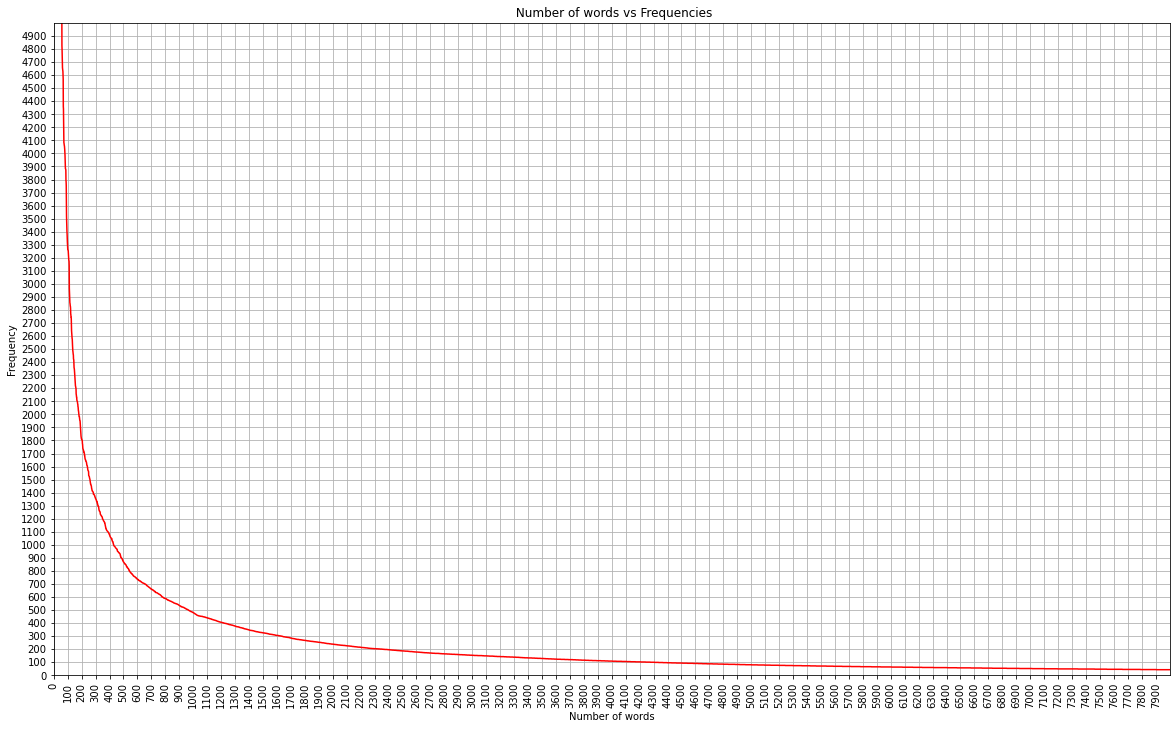

In [9]:
ans1 = []
freq = []
for i in range(len(sorted_dic)):
    ans1.append(i)
    freq.append(sorted_dic[i][1])
plt.plot(ans1,freq,'r')
plt.grid()
plt.axis([0,8000,1,5000])
plt.xticks(np.arange(0,8000,100),rotation = 90)
plt.yticks(np.arange(0,5000,100))
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.title(" Number of words vs Frequencies")
plt.show()

We can see that frequency dips below 200 when words increases from 2500+

Hence taking only the top 2500 words

In [10]:
answer = [sorted_dic[i][0] for i in range(2500)]
answer

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'can',
 'organization',
 'state',
 'gmt',
 'one',
 'ohio',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'like',
 'people',
 'university',
 'posting',
 'just',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'get',
 'usenet',
 'may',
 'zaphod',
 'alt',
 'think',
 'politics',
 'also',
 'windows',
 'time',
 'new',
 'use',
 'harvard',
 'rutgers',
 'near',
 'eng',
 'rec',
 'good',
 'system',
 'noc',
 'crabapple',
 'well',
 'sei',
 'soc',
 'das',
 'xref',
 'now',
 'even',
 'cis',
 'see',
 'world',
 'religion',
 'europa',
 'god',
 'gtefsd',
 'ece',
 'uunet',
 'two',
 'way',
 'org',
 'make',
 'many',
 'say',
 'first',
 'much',
 'christian',
 'gov',
 'right',
 'rochester',
 'distribution',
 'club',
 'mail',
 'max',
 'space',
 'andrew',
 'want',
 'gatech',
 'anyone',
 'udel',

### Making actual X_train

In [11]:
X_train = np.zeros([len(x_train),len(answer)],int)
for i in range(len(x_train)):
    text = x_train[i][1].lower()
    words = re.split(r"\W+", text)
    for word in words:
        if word in answer:
            X_train[i][answer.index(word)] += 1
X_train

array([[10,  2,  0, ...,  0,  0,  0],
       [12,  4,  3, ...,  0,  0,  0],
       [ 9,  1,  6, ...,  0,  0,  0],
       ...,
       [ 2,  1,  6, ...,  0,  0,  0],
       [ 6,  4,  6, ...,  0,  0,  0],
       [ 9,  2,  1, ...,  0,  0,  0]])

### Making actual X_test

In [12]:
X_test = np.zeros([len(x_test),len(answer)],int)
for i in range(len(x_test)):
    text = x_test[i][1].lower()
    words = re.split(r"\W+", text)
    for word in words:
        if word in answer:
            X_test[i][answer.index(word)] += 1
X_test

array([[10,  3,  1, ...,  0,  0,  0],
       [12,  4,  0, ...,  0,  0,  0],
       [ 9,  4,  3, ...,  0,  0,  0],
       ...,
       [ 7,  3,  3, ...,  0,  0,  0],
       [ 5,  2,  3, ...,  0,  0,  0],
       [ 2,  1,  2, ...,  0,  0,  0]])

In [13]:
# Our datasets are ready
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(14997, 2500)
(5000, 2500)
14997
5000


# Implementing Naive Bayes from scratch

In [27]:
def fit(X_train, y_train):
    dic = {}                                                            # Result
    y_train = np.array(y_train)
    classes = set(y_train)                                              # Creating unique values of classes
    dic["Total_documents"] = len(y_train)                               # Overall how many docs are present
    for current_class in classes:                                       # Iterating through each class
        temp = 0                                                        # Temp will store the total words in one class
        dic[current_class] = {}                                         # Creating nested dictionary
        X_train_with_current_class = X_train[y_train == current_class]  # Particular selection
        total_rows_of_current_class =  X_train_with_current_class.shape[0]
        for feature in answer:
            #Count of that feature:
            count = X_train_with_current_class[:,answer.index(feature)].sum()   # count is total words of 1 feature in selected rows
            dic[current_class][feature] = count
            temp += count
        dic[current_class]["Total_words_in_class"] = temp
        dic[current_class]["total_rows_of_current_class"] = total_rows_of_current_class
    
    return dic
        

In [28]:
def predict(X_test,dic):
    y_pred = []
    for row in X_test:
        # Predict for one value first
        y_pred.append(predict_for_single(row,dic))
    return y_pred

In [39]:
def predict_for_single(row,dic):
    classes = dic.keys()
    best_prob = -1000
    best_class = None
    first = True                          # So that program runs atleast once
    
    for current_class in classes:
        # Predict prob that the given row is from this class
        if current_class == 'Total_documents':
            continue
        prob = probability(current_class, row, dic)
        if first or prob > best_prob:               # Finding best probability amongst all classes
            best_prob = prob
            best_class = current_class
            first = False
    return best_class                               # returning best class

In [40]:
def probability(current_class, row, dic):
    prob = np.log(dic[current_class]["total_rows_of_current_class"]) - np.log(dic["Total_documents"])
    
    features = list(dic[current_class].keys())
    for i in range(len(features) -2):
        xj = row[i]
        
        if xj == 0:
            ans = 0
        else:
            numerator = dic[current_class][features[i]] + 1             # Laplace correction
            denominator = dic[current_class]["Total_words_in_class"] + len(dic[current_class].keys()) - 2     #Laplace correction
            ans = np.log(numerator) - np.log(denominator)
        prob = prob + ans                 # calculating total probability
    return prob

In [41]:
def score(y_pred, y_test):
    count = 0
    for i in range(len(y_test)):
        if (y_pred[i] == y_test[i]):
            count+=1
    return count/len(y_test)

### Main Function

In [42]:
dic = fit(X_train, y_train)
y_pred = predict(X_test, dic)
score = score(y_pred, y_test)


In [44]:
print("Score Achieved:", score)
print()
print(confusion_matrix(y_pred, y_test))
print()
print(classification_report(y_pred, y_test))

Score Achieved: 0.8782

[[196   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0  54]
 [  1 191  11   2   2  12   1   0   1   0   0   0   1   4   5   0   0   0
    0   0]
 [  0   6 215   2   0  22   0   0   0   0   0   0   0   1   0   0   0   0
    0   0]
 [  0  13  24 200  14   3   3   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   8   4  32 232   3   2   1   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   5   8   0   0 193   1   0   0   0   0   0   0   1   1   0   0   0
    0   0]
 [  1   4   4   7   4   0 227  10   7   2   2   2   2   0   3   0   0   1
    2   1]
 [  1   0   0   0   0   0   7 235   6   1   0   0   2   0   1   0   0   0
    0   0]
 [  2   0   0   0   0   2   1   3 245   2   3   0   0   1   0   0   0   0
    0   0]
 [  1   0   0   0   0   0   0   0   0 230   6   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   9 239   0   0   0   0   0   0   0
    0   0]
 [  1   1   1   0   0   1   1   0   0   0

# Implementing Sklearn's MultinomialNB

In [46]:

classifier = MultinomialNB()
# Fitting
classifier.fit(X_train, y_train)

# Predicting
y_pred = classifier.predict(X_test)

print("Score on training data:", classifier.score(X_train, y_train))
print("Score on testing data:", classifier.score(X_test, y_test))
print()
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

Score on training data: 0.8985130359405215
Score on testing data: 0.8618

[[188   0   0   0   0   0   1   2   1   0   0   1   2   0   1   1   1   2
    0  37]
 [  0 171   8  12  15  10   7   4   0   0   1   1   5   0   3   0   0   0
    0   0]
 [  0   3 228  20   5   8   4   0   0   0   0   0   2   0   1   0   0   0
    0   0]
 [  1   5   8 189  29   2   7   0   0   0   0   0   6   0   0   0   0   0
    0   0]
 [  0   1   2  17 225   0   6   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0  15  20   3   8 186   2   0   2   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   1   0   2   2   0 228   7   1   1   0   1   3   1   0   0   0   0
    0   0]
 [  0   0   0   0   2   0   8 233   5   0   1   0   5   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   0   6  14 236   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   4   4 224   9   0   1   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   4   3   8 233   0   1   0   0   0   0   0
  

**Conclusion**: We have implemented both ways and recieved the following scores

**Self_implementation score:** 0.88

**Sklearn's NaiveBayes score:** 0.86